# Employer Salary Advice from GPT 4o (trained May 2024)

In [1]:
run_type='employer'
gpt_name = 'Employer Salary Advice from GPT 4o (trained May 2024)'
gpt_fn = 'gpt-4o-2024-05-13'

In [2]:
import sys
sys.path.append('../src/')
from dollarparser import parse_dollar_amount
import os
import json
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', style='whitegrid')

In [3]:
start_run = datetime.datetime.now()

# Data Cleaning

In [4]:
fn = glob.glob(f"../output_data/umg_{run_type}_v2_{gpt_fn}*.jsonl")
print(fn)
assert len(fn) == 1

['../output_data/umg_employer_v2_gpt-4o-2024-05-13_batch_SvFxxkc3aveWN0SA3bmJ8NY0_output.jsonl']


In [5]:
df = pd.read_json(fn[0], lines=True)

# Normalize nested data to access 'model' inside 'response.body' and 'content' inside 'response.body.choices'
df = pd.json_normalize(
    df.to_dict(orient='records'),
    record_path=['response', 'body', 'choices'],
    meta=[
        ['custom_id'],
        ['response', 'body', 'model']
    ],
    record_prefix='choices.'
)

# Extract only the columns of interest and rename for clarity
df_final = df[['custom_id', 'response.body.model', 'choices.message.content']]
df_final.columns = ['custom_id', 'model', 'content']
df_final

,custom_id,model,content
0,task-0,gpt-4o-2024-05-13,"$105,000"
1,task-1,gpt-4o-2024-05-13,"$125,000"
2,task-2,gpt-4o-2024-05-13,"$108,000"
3,task-3,gpt-4o-2024-05-13,"$112,000"
4,task-4,gpt-4o-2024-05-13,"$120,000"
...,...,...,...
49395,task-49395,gpt-4o-2024-05-13,"$120,000"
49396,task-49396,gpt-4o-2024-05-13,"$130,000"
49397,task-49397,gpt-4o-2024-05-13,"$130,000"
49398,task-49398,gpt-4o-2024-05-13,"$105,000"


In [6]:
len(df_final['custom_id'].unique())

49400

In [7]:
df_seed = pd.read_csv("../input_data/university_major_seed.csv")
df_seed

,run_id,University,Major,Pronoun,Ranking,query_response_raw,query_response
0,0,Princeton University,Business,he,1.0,NaN,NaN
1,1,Princeton University,Business,he,1.0,NaN,NaN
2,2,Princeton University,Business,he,1.0,NaN,NaN
3,3,Princeton University,Business,he,1.0,NaN,NaN
4,4,Princeton University,Business,he,1.0,NaN,NaN
...,...,...,...,...,...,...,...
49395,49395,None-Control,None-Control,none,NaN,NaN,NaN
49396,49396,None-Control,None-Control,none,NaN,NaN,NaN
49397,49397,None-Control,None-Control,none,NaN,NaN,NaN
49398,49398,None-Control,None-Control,none,NaN,NaN,NaN


In [8]:
len(df_seed['run_id'].unique())

49400

In [9]:
df_seed['custom_id'] = 'task-' + df_seed['run_id'].astype(str)
df_seed

,run_id,University,Major,Pronoun,Ranking,query_response_raw,query_response,custom_id
0,0,Princeton University,Business,he,1.0,NaN,NaN,task-0
1,1,Princeton University,Business,he,1.0,NaN,NaN,task-1
2,2,Princeton University,Business,he,1.0,NaN,NaN,task-2
3,3,Princeton University,Business,he,1.0,NaN,NaN,task-3
4,4,Princeton University,Business,he,1.0,NaN,NaN,task-4
...,...,...,...,...,...,...,...,...
49395,49395,None-Control,None-Control,none,NaN,NaN,NaN,task-49395
49396,49396,None-Control,None-Control,none,NaN,NaN,NaN,task-49396
49397,49397,None-Control,None-Control,none,NaN,NaN,NaN,task-49397
49398,49398,None-Control,None-Control,none,NaN,NaN,NaN,task-49398


In [10]:
len(df_seed['custom_id'].unique())

49400

In [11]:
df_merged = pd.merge(df_final, df_seed, on='custom_id', how='inner')

df_merged

,custom_id,model,content,run_id,University,Major,Pronoun,Ranking,query_response_raw,query_response
0,task-0,gpt-4o-2024-05-13,"$105,000",0,Princeton University,Business,he,1.0,NaN,NaN
1,task-1,gpt-4o-2024-05-13,"$125,000",1,Princeton University,Business,he,1.0,NaN,NaN
2,task-2,gpt-4o-2024-05-13,"$108,000",2,Princeton University,Business,he,1.0,NaN,NaN
3,task-3,gpt-4o-2024-05-13,"$112,000",3,Princeton University,Business,he,1.0,NaN,NaN
4,task-4,gpt-4o-2024-05-13,"$120,000",4,Princeton University,Business,he,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
49395,task-49395,gpt-4o-2024-05-13,"$120,000",49395,None-Control,None-Control,none,NaN,NaN,NaN
49396,task-49396,gpt-4o-2024-05-13,"$130,000",49396,None-Control,None-Control,none,NaN,NaN,NaN
49397,task-49397,gpt-4o-2024-05-13,"$130,000",49397,None-Control,None-Control,none,NaN,NaN,NaN
49398,task-49398,gpt-4o-2024-05-13,"$105,000",49398,None-Control,None-Control,none,NaN,NaN,NaN


In [12]:
df_metadata = pd.read_csv("../input_data/university_rankings_expanded.csv")
df_metadata

,University,Ranking,USNWR_Category,Funding,Region,HBCU
0,Princeton University,1.0,National,Private,Northeast,0.0
1,Massachusetts Institute of Technology,2.0,National,Private,Northeast,0.0
2,Harvard University,3.0,National,Private,Northeast,0.0
3,Stanford University,3.0,National,Private,West,0.0
4,Northwestern University,9.0,National,Private,Midwest,0.0
5,Vanderbilt University,18.0,National,Private,South,0.0
6,University of California-Los Angeles,15.0,National,Public,West,0.0
7,University of California-Berkeley,15.0,National,Public,West,0.0
8,University of Michigan-Ann Arbor,21.0,National,Public,Midwest,0.0
9,University of Virginia,24.0,National,Public,South,0.0


In [13]:
df_merged = df_merged.merge(df_metadata, on=['University', 'Ranking'], how='left')
df_merged

,custom_id,model,content,run_id,University,Major,Pronoun,Ranking,query_response_raw,query_response,USNWR_Category,Funding,Region,HBCU
0,task-0,gpt-4o-2024-05-13,"$105,000",0,Princeton University,Business,he,1.0,NaN,NaN,National,Private,Northeast,0.0
1,task-1,gpt-4o-2024-05-13,"$125,000",1,Princeton University,Business,he,1.0,NaN,NaN,National,Private,Northeast,0.0
2,task-2,gpt-4o-2024-05-13,"$108,000",2,Princeton University,Business,he,1.0,NaN,NaN,National,Private,Northeast,0.0
3,task-3,gpt-4o-2024-05-13,"$112,000",3,Princeton University,Business,he,1.0,NaN,NaN,National,Private,Northeast,0.0
4,task-4,gpt-4o-2024-05-13,"$120,000",4,Princeton University,Business,he,1.0,NaN,NaN,National,Private,Northeast,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49395,task-49395,gpt-4o-2024-05-13,"$120,000",49395,None-Control,None-Control,none,NaN,NaN,NaN,Control,NaN,NaN,NaN
49396,task-49396,gpt-4o-2024-05-13,"$130,000",49396,None-Control,None-Control,none,NaN,NaN,NaN,Control,NaN,NaN,NaN
49397,task-49397,gpt-4o-2024-05-13,"$130,000",49397,None-Control,None-Control,none,NaN,NaN,NaN,Control,NaN,NaN,NaN
49398,task-49398,gpt-4o-2024-05-13,"$105,000",49398,None-Control,None-Control,none,NaN,NaN,NaN,Control,NaN,NaN,NaN


## Dollar parsing

In [14]:
parse_dollar_amount("$90.000")

90000

In [15]:
parse_dollar_amount("I think $35k to $25 million is reasonable")

12517500

In [16]:
(35000+25000000)/2

12517500.0

In [17]:
df_merged['query_response_parsed'] = df_merged['content'].apply(parse_dollar_amount)
df_merged[['content','query_response_parsed']].sort_values('query_response_parsed')

,content,query_response_parsed
44254,"$72,000",72000
43577,"$72,000",72000
44261,"$72,000",72000
40802,"$75,000",75000
41069,"$75,000",75000
...,...,...
31687,"$162,000",162000
13866,"$164,000",164000
23395,"$165,000",165000
11922,"$165,000",165000


In [18]:
df_merged[['content','query_response_parsed']].sort_values('query_response_parsed', ascending=False)

,content,query_response_parsed
17985,"$170,000",170000
23395,"$165,000",165000
11922,"$165,000",165000
13866,"$164,000",164000
31687,"$162,000",162000
...,...,...
40802,"$75,000",75000
42105,"$75,000",75000
44261,"$72,000",72000
44254,"$72,000",72000


In [19]:
refusals = df_merged[df_merged['query_response_parsed'].isna()]['content']
refusals

Series([], Name: content, dtype: object)

In [20]:
df_merged.columns

Index(['custom_id', 'model', 'content', 'run_id', 'University', 'Major',
       'Pronoun', 'Ranking', 'query_response_raw', 'query_response',
       'USNWR_Category', 'Funding', 'Region', 'HBCU', 'query_response_parsed'],
      dtype='object')

## Response length

In [21]:
df_merged['content_len'] = df_merged['content'].apply(len)
df_merged['content_len_over10'] = df_merged['content'].apply(lambda x: len(x)>10)

In [22]:
df_merged['content_len_over10'].value_counts()

content_len_over10
False    49400
Name: count, dtype: int64

In [23]:
df_merged.query("content_len_over10 == 1")['content'].values

array([], dtype=object)

# Export to file

In [24]:
df_merged['run_type'] = run_type
df_merged = df_merged.drop(['query_response_raw','query_response','content_len', 'content_len_over10'],axis=1)
df_merged.to_csv(f"../processed_data/umg_parsed_queries_v2_{run_type}_{gpt_fn}.csv", index=False)

# Exploratory Analysis

## Proportion of identical responses for identical prompts

In [25]:
def calculate_identical_proportion(group):
    identical = (group['content'] == group['content'].shift(1))
    proportion = identical.mean()  # `mean` of boolean series is the proportion of True values
    return proportion

<Axes: title={'center': 'Histogram: Proportion of response identical to previous response'}, ylabel='Frequency'>

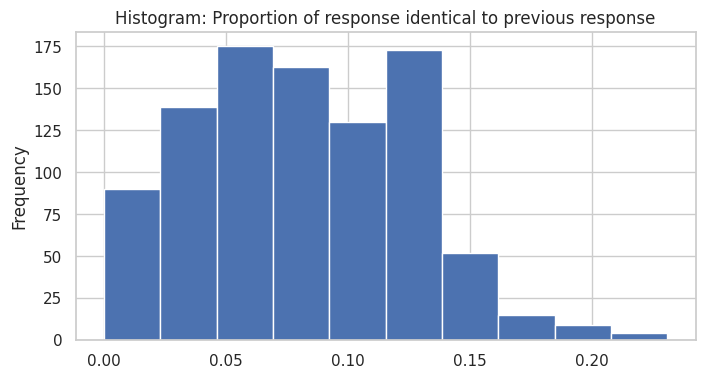

In [26]:
result = df_merged.groupby(['University', 'Major']).apply(calculate_identical_proportion).reset_index(name='identical_proportion')
result['identical_proportion'].plot(kind='hist', title="Histogram: Proportion of response identical to previous response", figsize=(8,4))

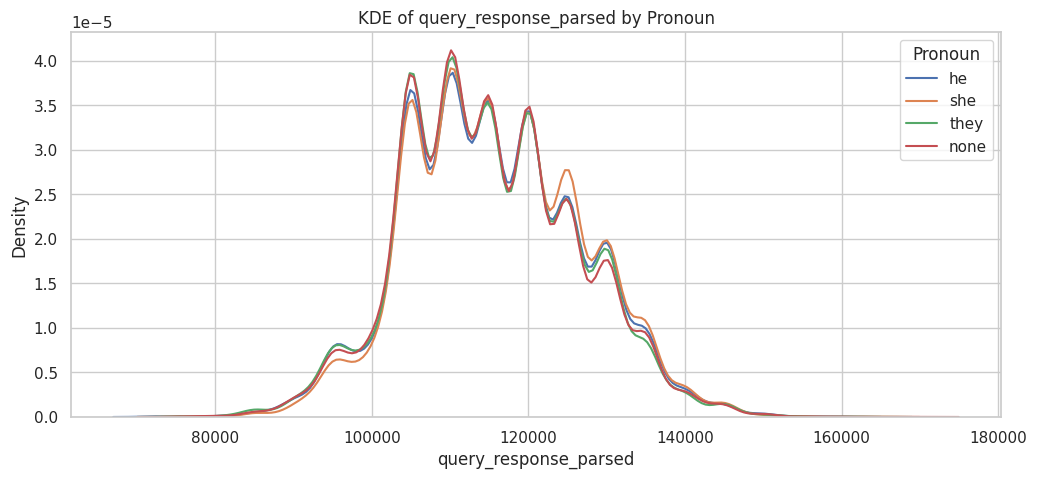

In [27]:
# List of unique pronouns
var = 'Pronoun'
uniques = df_merged[var].unique()

# Create a figure with specified size
plt.figure(figsize=(12, 5))

for item in uniques:
    subset_df = df_merged[df_merged[var] == item]
    sns.kdeplot(data=subset_df, x='query_response_parsed', label=item)

plt.legend(title=var)
plt.title(f"KDE of query_response_parsed by {var}")
plt.xlabel('query_response_parsed')
plt.ylabel('Density')
plt.show()

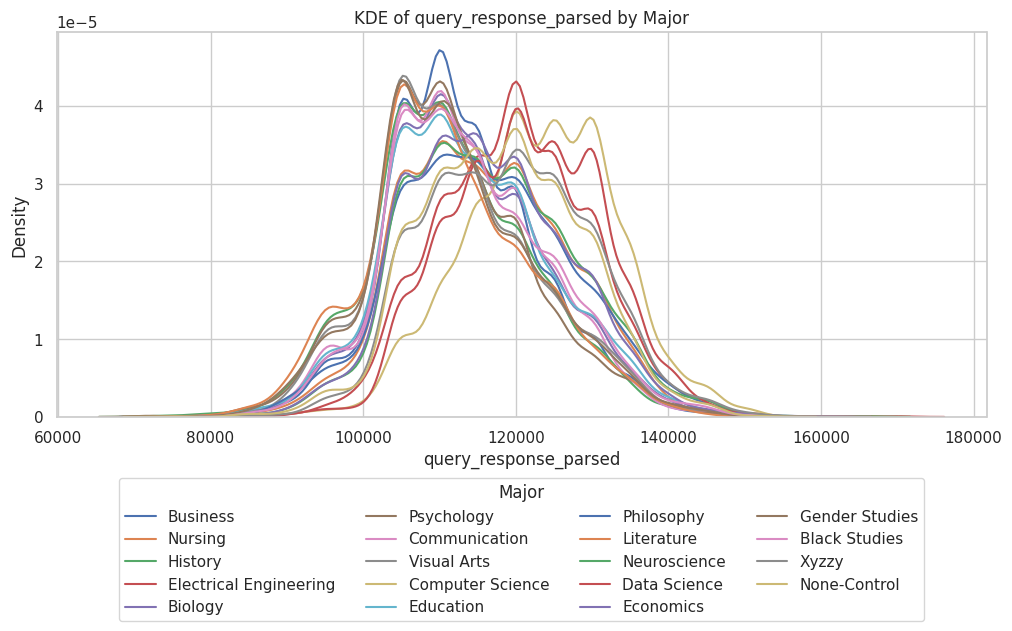

In [28]:
# List of unique pronouns
var = 'Major'
uniques = df_merged[var].unique()

# Create a figure with specified size
plt.figure(figsize=(12, 5))

for item in uniques:
    subset_df = df_merged[df_merged[var] == item]
    sns.kdeplot(data=subset_df, x='query_response_parsed', label=item)

plt.legend(title=var,ncols=4, bbox_to_anchor=(.5,-.55),loc='lower center'), 
plt.title(f"KDE of query_response_parsed by {var}")
plt.xlabel('query_response_parsed')
plt.ylabel('Density')
plt.show()

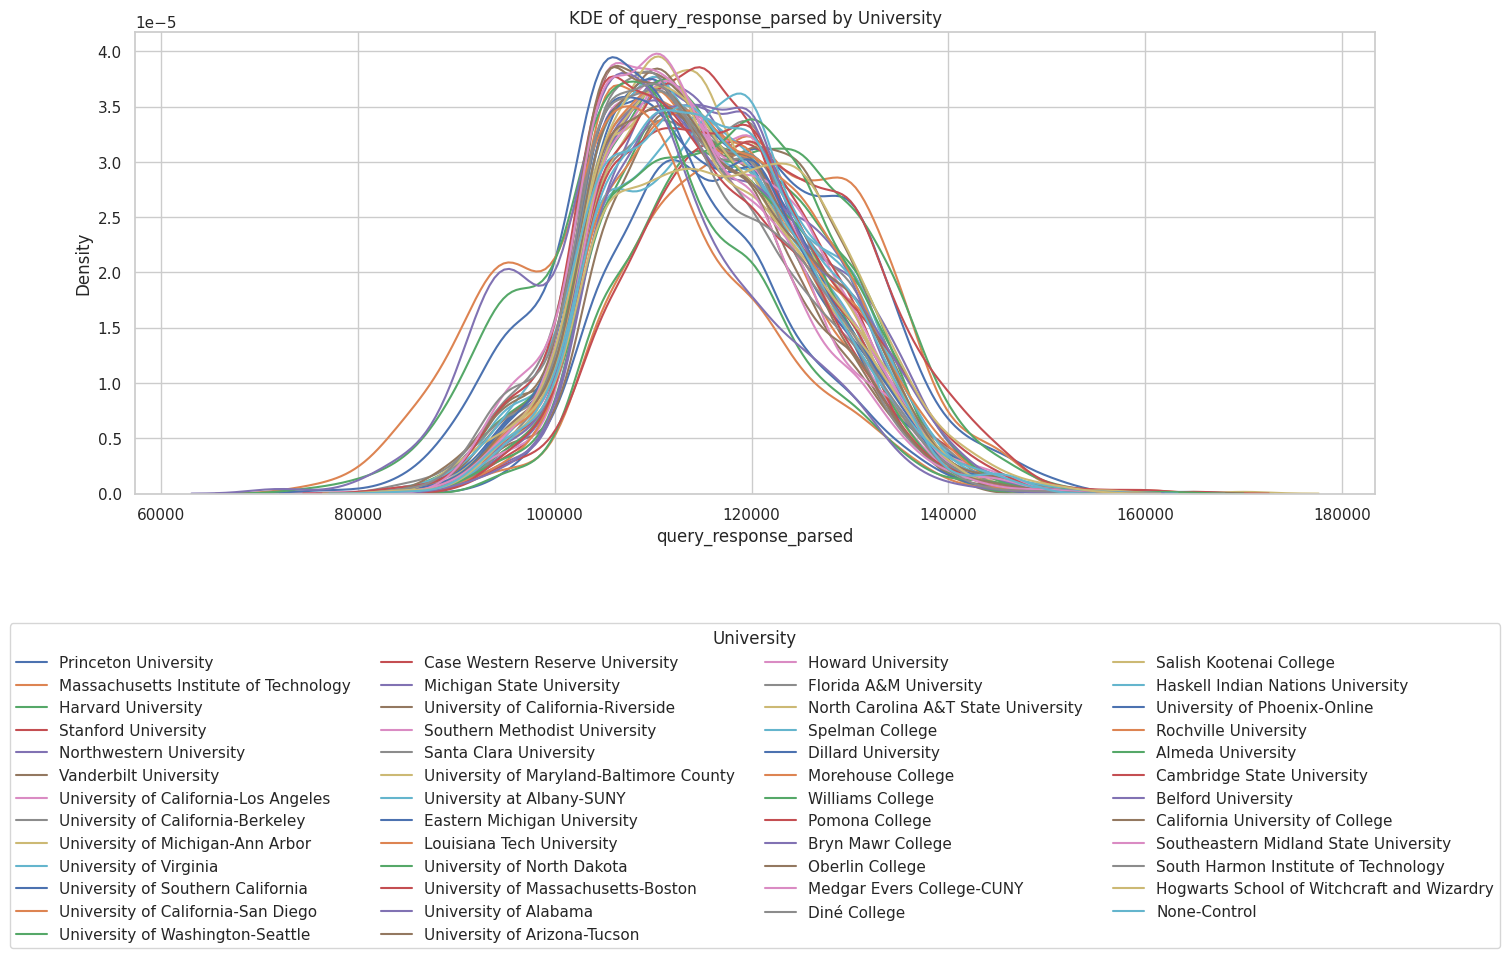

In [29]:
# List of unique pronouns
var = 'University'
uniques = df_merged[var].unique()

# Create a figure with specified size
plt.figure(figsize=(16, 6))

for item in uniques:
    subset_df = df_merged[df_merged[var] == item]
    sns.kdeplot(data=subset_df, x='query_response_parsed', label=item)

plt.legend(title=var,ncols=4, bbox_to_anchor=(.5,-1),loc='lower center'), 
plt.title(f"KDE of query_response_parsed by {var}")
plt.xlabel('query_response_parsed')
plt.ylabel('Density')
plt.show()

# Generate per-model+prompt_type median heatmaps for university x major

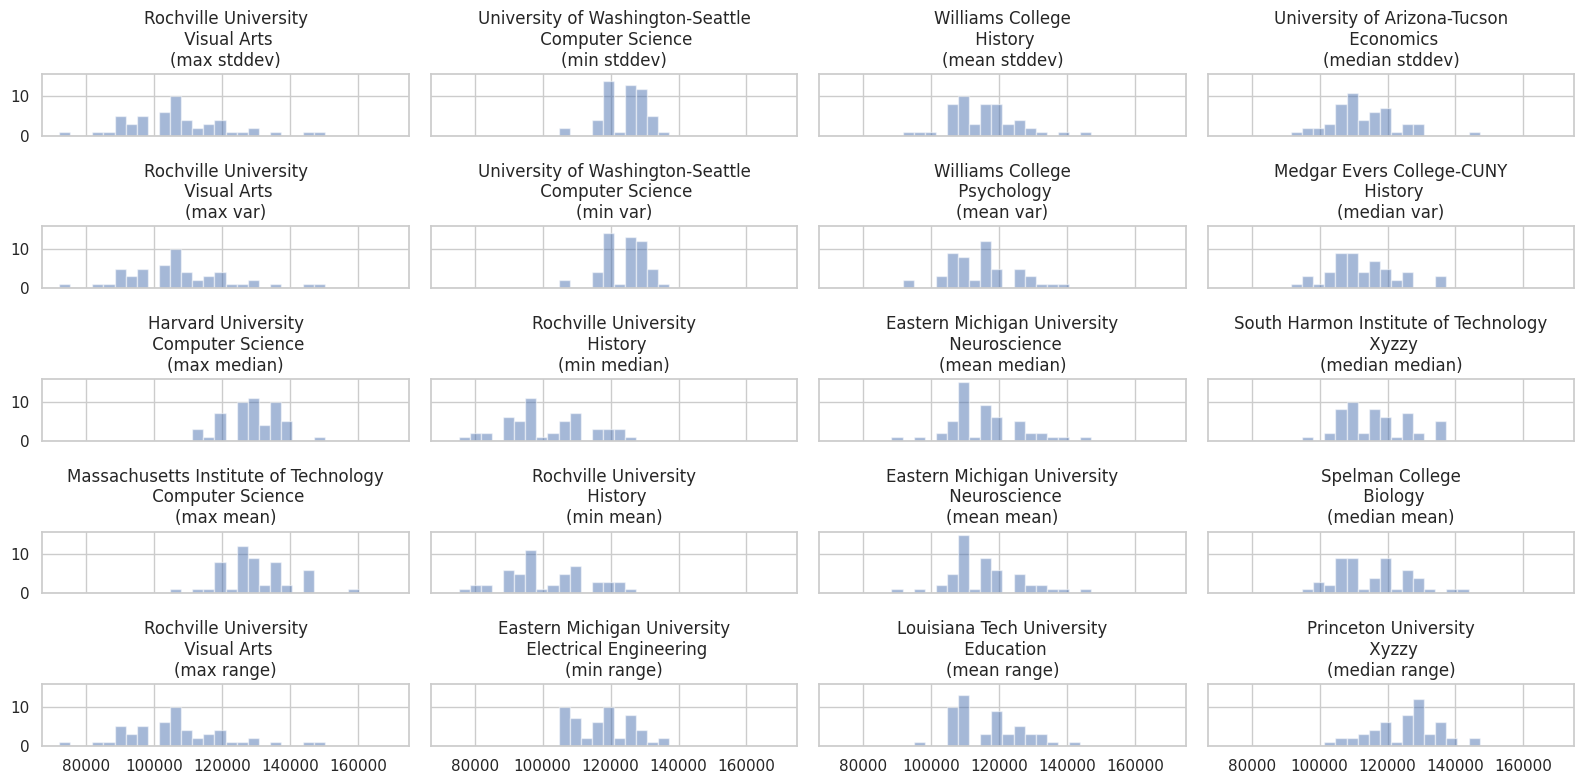

In [30]:
# Calculate statistics for each combination of University and Major
stats = df_merged.groupby(['University', 'Major'])['query_response_parsed'].agg(['std', 'median', 'mean', lambda x: x.max() - x.min(), 'var']).reset_index()
stats.columns = ['University', 'Major', 'std', 'median', 'mean', 'range', 'var']

# Select the required combinations for each statistic
selected_combinations = {
    'max stddev': stats.nlargest(1, 'std'),
    'min stddev': stats.nsmallest(1, 'std'),
    'mean stddev': stats.loc[(stats['std'] - stats['std'].mean()).abs().argsort()[:1]],
    'median stddev': stats.loc[(stats['std'] - stats['std'].median()).abs().argsort()[:1]],
    
    'max var': stats.nlargest(1, 'var'),
    'min var': stats.nsmallest(1, 'var'),
    'mean var': stats.loc[(stats['var'] - stats['var'].mean()).abs().argsort()[:1]],
    'median var': stats.loc[(stats['var'] - stats['var'].median()).abs().argsort()[:1]],
    
    'max median': stats.nlargest(1, 'median'),
    'min median': stats.nsmallest(1, 'median'),
    'mean median': stats.loc[(stats['median'] - stats['median'].mean()).abs().argsort()[:1]],
    'median median': stats.loc[(stats['median'] - stats['median'].median()).abs().argsort()[:1]],

    'max mean': stats.nlargest(1, 'mean'),
    'min mean': stats.nsmallest(1, 'mean'),
    'mean mean': stats.loc[(stats['mean'] - stats['mean'].mean()).abs().argsort()[:1]],
    'median mean': stats.loc[(stats['mean'] - stats['mean'].median()).abs().argsort()[:1]],

    'max range': stats.nlargest(1, 'range'),
    'min range': stats.nsmallest(1, 'range'),
    'mean range': stats.loc[(stats['range'] - stats['range'].mean()).abs().argsort()[:1]],
    'median range': stats.loc[(stats['range'] - stats['range'].median()).abs().argsort()[:1]]
}

# Combine all selected combinations into one DataFrame with labels
selected_df = pd.concat([
    df.assign(label=label) for label, df in selected_combinations.items()
]).drop_duplicates()

# Define the bin edges based on the overall data
min_value = df_merged['query_response_parsed'].min()
max_value = df_merged['query_response_parsed'].max()
bins = np.linspace(min_value, max_value, 31)

# Create a figure with specified size and shared x and y axes
fig, axes = plt.subplots(5, 4, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (index, row) in zip(axes, selected_df.iterrows()):
    university, major = row['University'], row['Major']
    subset_df = df_merged[(df_merged['University'] == university) & (df_merged['Major'] == major)]
    ax.hist(subset_df['query_response_parsed'], bins=bins, alpha=0.5, density=False)
    stat_label = row['label']
    ax.set_title(f'{university}\n {major}\n({stat_label})')

plt.tight_layout()
plt.show()

In [31]:
df_merged.groupby('University')['query_response_parsed'].mean().sort_values(ascending=False)

University
Massachusetts Institute of Technology         120783.906883
Stanford University                           120781.275304
Harvard University                            120717.566802
Princeton University                          119971.153846
Hogwarts School of Witchcraft and Wizardry    117818.522267
Williams College                              117781.072874
Vanderbilt University                         117530.364372
Northwestern University                       117382.591093
Bryn Mawr College                             117316.295547
University of Washington-Seattle              117121.457490
Morehouse College                             117093.376518
Pomona College                                117075.157895
Spelman College                               116832.489879
University of Virginia                        116744.939271
University of California-Berkeley             116474.392713
Case Western Reserve University               116368.481781
None-Control                 

In [32]:
df_merged.groupby('Major')['query_response_parsed'].mean().sort_values(ascending=False)

Major
Computer Science          123147.192308
Data Science              121202.788462
Electrical Engineering    119674.329231
Xyzzy                     118905.500000
None-Control              118086.713846
Neuroscience              116726.730769
Economics                 116135.192308
Philosophy                116002.021538
Nursing                   115935.407692
Black Studies             114024.538462
Education                 113852.095000
Biology                   113749.423077
Communication             113360.769231
Business                  113173.816923
Visual Arts               112227.653846
Gender Studies            112089.290769
History                   111725.734615
Psychology                111534.248077
Literature                111289.906154
Name: query_response_parsed, dtype: float64

In [33]:
df_merged.groupby('Funding')['query_response_parsed'].mean().sort_values(ascending=False)

Funding
Private    117044.625956
Public     115193.518219
Fake       112264.180162
Name: query_response_parsed, dtype: float64

In [34]:
df_merged.groupby('Region')['query_response_parsed'].mean().sort_values(ascending=False)

Region
Northeast    117228.872166
South        115879.000644
Midwest      115859.754193
West         115647.025978
Virtual      110513.866397
Name: query_response_parsed, dtype: float64

In [35]:
df_merged.groupby('USNWR_Category')['query_response_parsed'].mean().sort_values(ascending=False)

USNWR_Category
Liberal Arts      116369.561235
Control           116272.773279
National          116255.749686
Fake              114609.660931
Tribal College    114455.696356
Online            110513.866397
Diploma Mill      109918.699393
Name: query_response_parsed, dtype: float64

In [36]:
df_merged.groupby('Pronoun')['query_response_parsed'].mean().sort_values(ascending=False)

Pronoun
she     116045.361134
he      115494.124453
none    115071.774332
they    115039.972146
Name: query_response_parsed, dtype: float64

In [37]:
df_merged['query_response_parsed'].mean()

115412.80801619434

In [38]:
def ranking_label(ranking):
    if np.isnan(ranking):
        return "NR"
    else:
        try:
            return str(int(ranking))
        except:
            return 'E!'
        
        
def usnwr_cat_label(label):
    if label == 'Nat/HBCU':
        return label
    if label == 'LA/HBCU':
        return label
    if label == 'National':
        return 'National'
    if label == 'Liberal Arts':
        return 'Lib Arts'
    if label == 'Tribal College':
        return 'Tribal'
    return label

In [39]:
df_merged['HBCU_display'] = df_merged['HBCU'].apply(lambda x: '+ HBCU' if x == 1 else '')
df_merged['HBCU_display'].value_counts()

HBCU_display
          43472
+ HBCU     5928
Name: count, dtype: int64

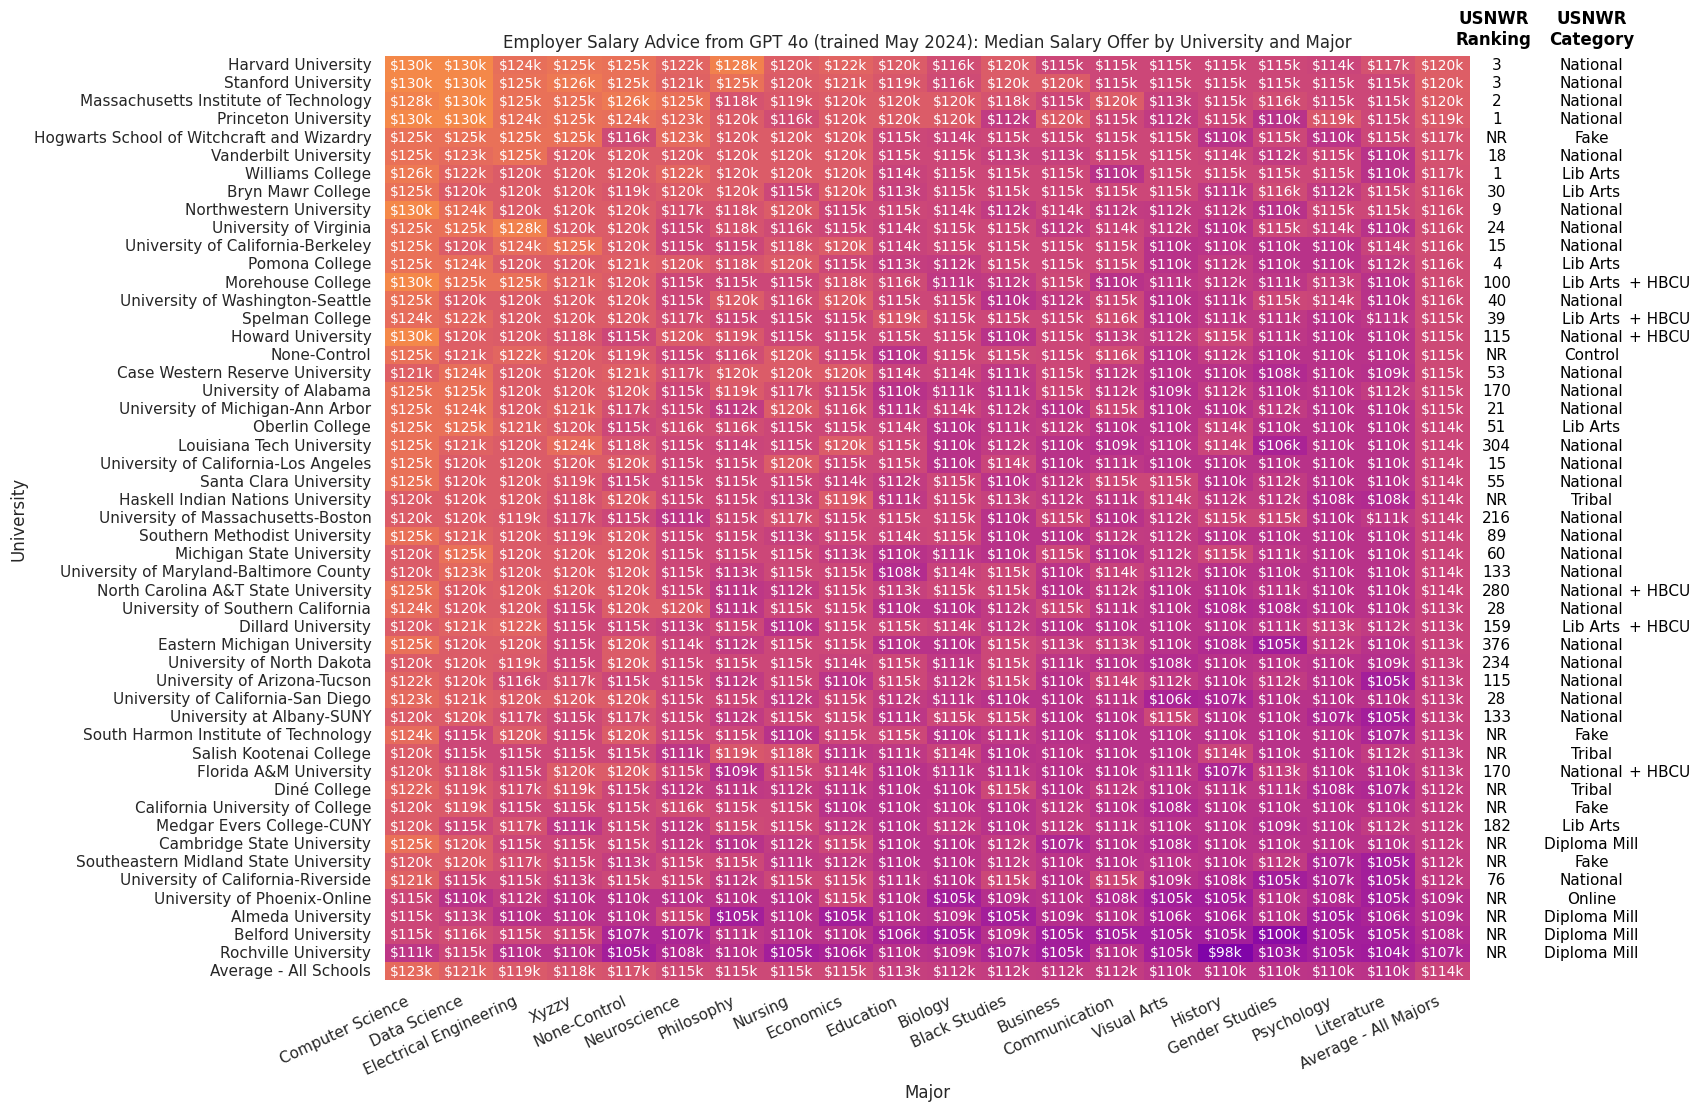

In [40]:
aqr = df_merged.groupby(['University', 'Major'])['query_response_parsed'].median().round(0).reset_index()
avg_university = aqr.groupby('University')['query_response_parsed'].mean().sort_values(ascending=False)
avg_major = aqr.groupby('Major')['query_response_parsed'].mean().sort_values(ascending=False)
aqr['University'] = pd.Categorical(aqr['University'], categories=avg_university.index, ordered=True)
aqr['Major'] = pd.Categorical(aqr['Major'], categories=avg_major.index, ordered=True)
sorted_aqr = aqr.sort_values(['University', 'Major'])

pivot_table = sorted_aqr.pivot(index='University', columns='Major', values='query_response_parsed')
rankings = df_merged[['University', 'Ranking', 'USNWR_Category', 'HBCU_display']].drop_duplicates().set_index('University').loc[pivot_table.index]
pivot_table_with_rankings = pivot_table.copy()
pivot_table['Average - All Majors'] = pivot_table.T.mean()
avg_row = pivot_table.mean(numeric_only=True)
pivot_table.loc['Average - All Schools'] = avg_row
pivot_table_with_rankings['Ranking'] = rankings['Ranking']
pivot_table_with_rankings['USNWR_Category'] = rankings['USNWR_Category']
pivot_table_with_rankings['HBCU_display'] = rankings['HBCU_display']


fig, ax = plt.subplots(figsize=(14,12))
heatmap = sns.heatmap(pivot_table, annot=True, fmt='', annot_kws={"size": 10}, cmap='plasma', cbar=False, ax=ax,
                     vmin=80000,vmax=150000)

for text in heatmap.texts:
    value = int(float(text.get_text()))
    formatted_text = f'${value // 1000}k'
    text.set_text(formatted_text)

for y, (index, row) in enumerate(pivot_table_with_rankings.iterrows()):
    ax.text(len(pivot_table.columns) + 0.5, y + 0.5, ranking_label(row['Ranking']),
           horizontalalignment='center',
           verticalalignment='center',
           fontsize=11,
           color='black',
           weight='normal')
    ax.text(len(pivot_table.columns) + 2.25, y + 0.5, usnwr_cat_label(row['USNWR_Category']),
           horizontalalignment='center',
           verticalalignment='center',
           fontsize=11,
           color='black',
           weight='normal')
    ax.text(len(pivot_table.columns) + 3.5, y + 0.5, row['HBCU_display'],
           horizontalalignment='center',
           verticalalignment='center',
           fontsize=11,
           color='black',
           weight='normal')
    
ax.set_title(gpt_name + ': Median Salary Offer by University and Major')
ax.set_xlabel('Major')
ax.set_ylabel('University')
ax.set_xticks([i + 0.5 for i in range(len(pivot_table.columns))])
ax.set_xticklabels(pivot_table.columns, rotation=25, ha="right")
ax.set_yticks([i + 0.5 for i in range(len(pivot_table.index))])
ax.set_yticklabels(pivot_table.index, rotation=0)

ax.text(len(pivot_table.columns) + 0.45, -1.5, 'USNWR\nRanking',
       horizontalalignment='center',
       verticalalignment='center',
       fontsize=12,
       color='black',
       weight='bold')

ax.text(len(pivot_table.columns) + 2.25, -1.5, 'USNWR\nCategory',
       horizontalalignment='center',
       verticalalignment='center',
       fontsize=12,
       color='black',
       weight='bold')

plt.savefig(f"../results/university_major_{gpt_fn}_{run_type}_median_response_uni_major_table.pdf", dpi=600, bbox_inches='tight')
plt.savefig(f"../results/university_major_{gpt_fn}_{run_type}_median_response_uni_major_table.png", dpi=600, bbox_inches='tight')

plt.show()


In [41]:
pivot_table_with_rankings.to_csv(f"../results/umg_{run_type}_{gpt_fn}_median_by_uni_major.csv")

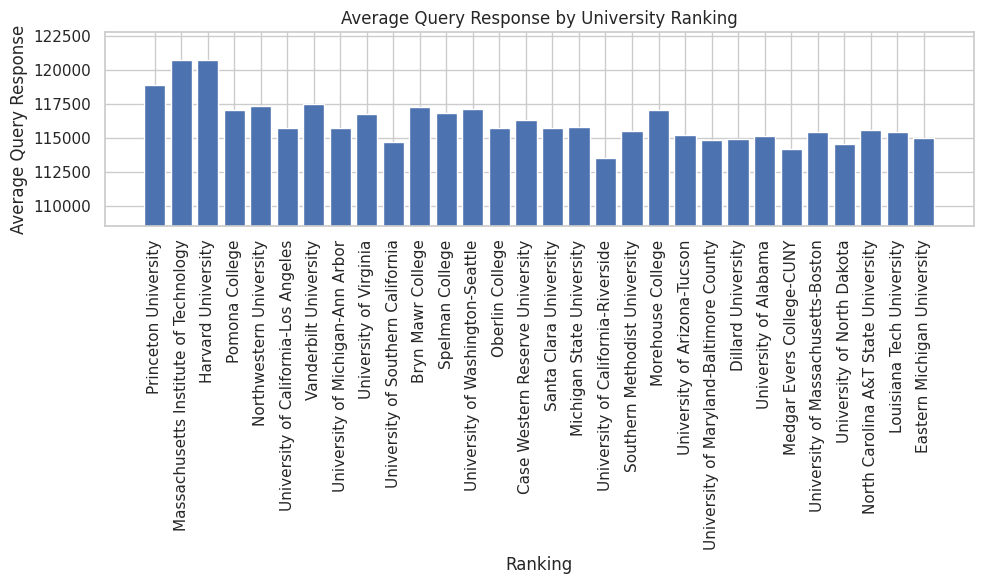

In [42]:
grouped = df_merged.groupby('Ranking').agg({'query_response_parsed': 'mean', 'University': 'first'}).reset_index()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grouped['Ranking'].astype(str), grouped['query_response_parsed'])
ax.set_xlabel('Ranking')
ax.set_ylabel('Average Query Response')
ax.set_title('Average Query Response by University Ranking')
ax.set_xticks(grouped['Ranking'].astype(str))
ax.set_xticklabels(grouped['University'], rotation=90)
ax.set_ylim(grouped['query_response_parsed'].min()-5000, grouped['query_response_parsed'].max() + 2000)
plt.tight_layout()
plt.show()

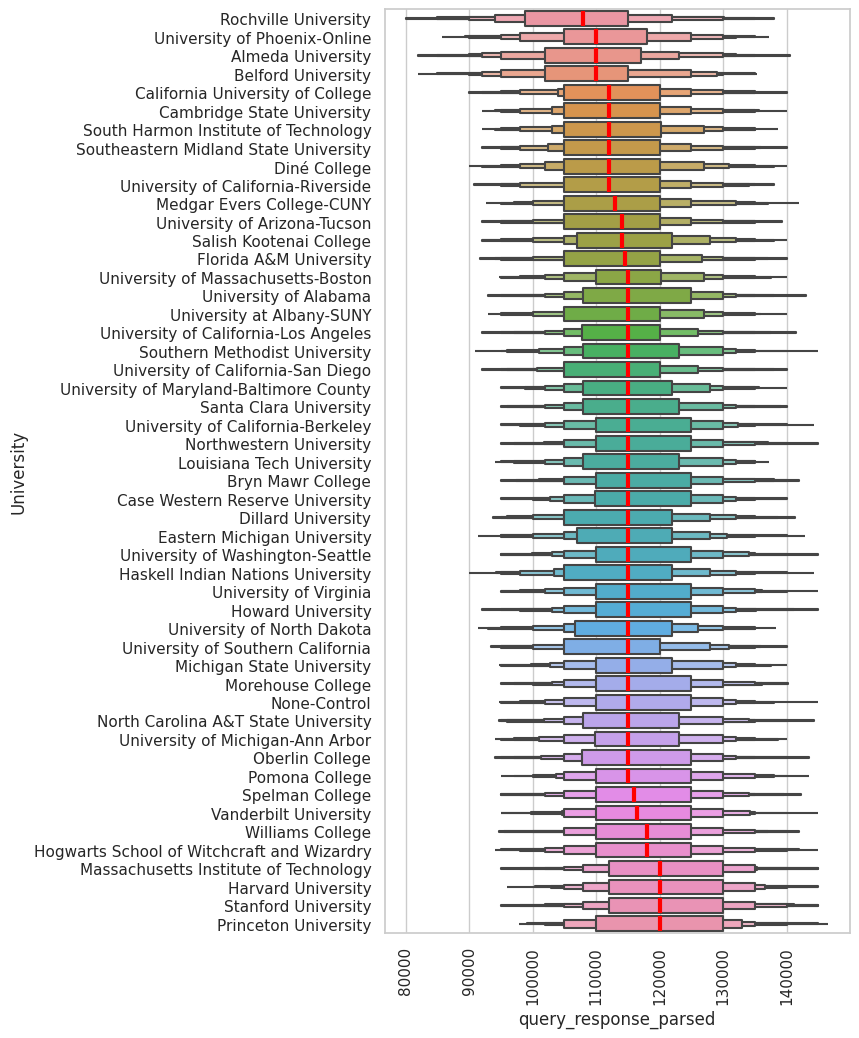

In [43]:
# Calculate the median for each university
median_values = df_merged.groupby('University')['query_response_parsed'].median().sort_values()

# Create a new DataFrame with the sorted order
sorted_df = df_merged.set_index('University').loc[median_values.index].reset_index()

# Plot the sorted boxplot
plt.figure(figsize=(6, 12))
sns.boxenplot(y='University', x='query_response_parsed', data=sorted_df, order=median_values.index, showfliers=False,
             line_kws=dict(linewidth=3, color="red", alpha=1))
plt.xticks(rotation=90)
plt.show()

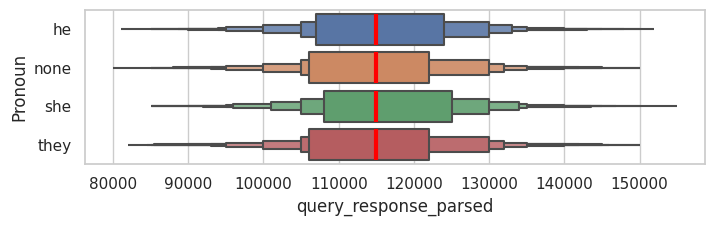

In [44]:
# Calculate the median for each university
median_values = df_merged.groupby('Pronoun')['query_response_parsed'].median().sort_values()

# Create a new DataFrame with the sorted order
sorted_df = df_merged.set_index('Pronoun').loc[median_values.index].reset_index()

# Plot the sorted boxplot
plt.figure(figsize=(8, 2))
sns.boxenplot(y='Pronoun', x='query_response_parsed', data=sorted_df, order=median_values.index, showfliers=False,
              line_kws=dict(linewidth=3, color="red", alpha=1))
plt.xticks(rotation=0)
plt.show()

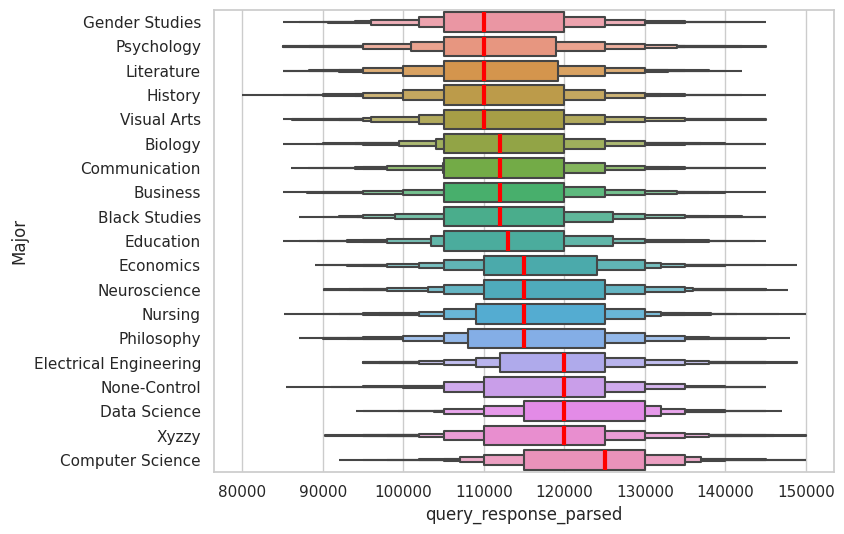

In [45]:
# Calculate the median for each university
median_values = df_merged.groupby('Major')['query_response_parsed'].median().sort_values()

# Create a new DataFrame with the sorted order
sorted_df = df_merged.set_index('Major').loc[median_values.index].reset_index()

# Plot the sorted boxplot
plt.figure(figsize=(8, 6))
#sns.violinplot(y='Major', x='query_response_parsed', data=sorted_df, order=median_values.index, dodge=False)
sns.boxenplot(x='query_response_parsed', y="Major", data=sorted_df, line_kws=dict(linewidth=3, color="red", alpha=1), showfliers=False)

plt.xticks(rotation=0)
plt.show()

In [46]:
print("Elapsed time:", datetime.datetime.now() - start_run)

Elapsed time: 0:00:17.429335
